[ 0 -1]
[0.  0.5]


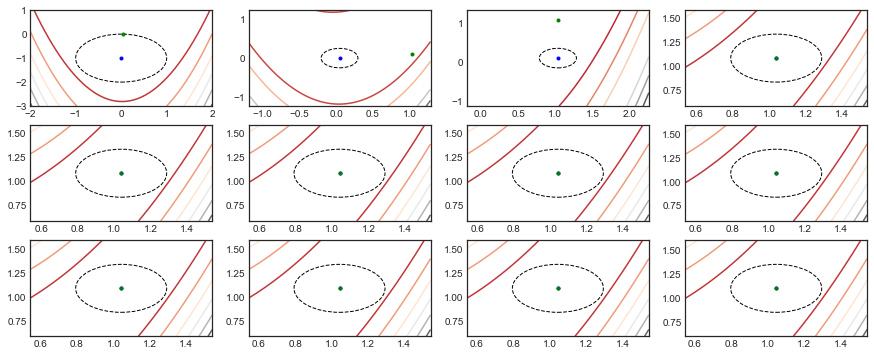

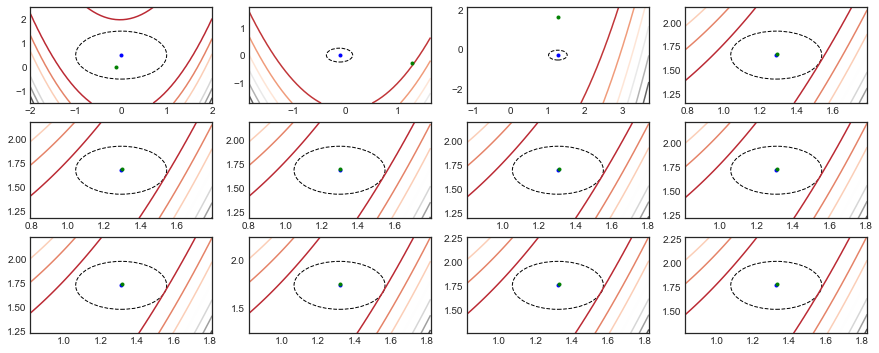

In [212]:
################
# Jarry Ngandjui
# Hw7
################


##########
# Ex: 4.1
##########

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import numpy as np
import numpy.linalg as LA


def f(x1, x2=None):
    if x2 is None:
        x2 = x1[1]
        x1 = x1[0]
    fx = 10 * (x2 - x1**2)**2 + (1 - x1)**2
    return fx

def gradient_f(X):
    partial_x1 = -40*X[0]*(X[1]-X[0]**2) + (-2)*(1-X[0])
    partial_x2 = 20 * (X[1] - X[0]**2)
    return np.matrix([partial_x1, partial_x2]).T

def hessian_f(X):
    partial_sq_x1 = -40*(X[1]-X[0]**2) + 8*X[0]**2 + 2
    partial_sq_x1x2 = -40*X[0]
    partial_sq_x2 = 20
    return np.matrix([[partial_sq_x1, partial_sq_x1x2], [partial_sq_x1x2, partial_sq_x2]]).T

def mk(pk, fk, grk, bk):
    mk = fk + grk.T * pk + 0.5 * (pk.T * ( bk * pk))
    return mk
        


# par is the inital point
# f, function f
# gr, gradient of f
# H, hessian of f
# itr, number of iterations
# tol, tolerance of convergence, x(k) - x(k-1)
# MAX_DELTA, bound on radius of trust region

def trustRegion(par, f, gr, H, itr=12, tol=10**-3, MAX_DELTA=2): 
    fig, ax = plt.subplots(nrows=3, ncols=4)
    fig.set_figheight(6)
    fig.set_figwidth(15)
    
    assert(MAX_DELTA > 0)
    n = 50
    deltak = 1
    xk = par

    for i in range(12):
        fk = f(xk)
        grk = gr(xk)
        bk = H(xk)
        pk = -1 * LA.inv(bk) * grk
         
        # Adjust the trust-region radius
        xpk = np.array([pk.T[0, 0], pk.T[0, 1]])
        zero = np.matrix(np.zeros(par.size)).T
        rhoK = (fk - f(xk + xpk)) / (mk(zero, fk, grk, bk) - mk(pk, fk, grk, bk))
        # We were over confident reduce the step size
        if (rhoK < 1/4):
            deltak = 1/4 * deltak
        else: 
            # We were conservative increase the step size
            if rhoK > 3/4 and LA.norm(pk) == deltak:
                deltak = np.min(2*deltak, MAX_DELTA)
            else:
                deltak = deltak
        
        xk1 = xk + xpk
        
        # Visualize each iteration region
        
        # Plot the Contour
        h = np.max([2 * abs(deltak), abs(xk1[0] - xk[0])*5/4, abs(xk1[1] - xk[1])*5/4])
        x = np.linspace(-h + xk[0], h + xk[0], n)
        y = np.linspace(-h + xk[1], h + xk[1], n)
        X, Y = np.meshgrid(x, y)
        Z = f(X, Y)
        ax[i//4][i%4].contour(X, Y, Z, cmap='RdGy')
        # Plot the trust region
        r = deltak
        trust_region = plt.Circle(xk, deltak, ls='--', color='black', fill=False)
        ax[i//4][i%4].add_patch(trust_region)
        #add point xk in blue
        ax[i//4][i%4].plot(xk[0], xk[1], marker='o', markersize=3, color="blue")
        #add point xk + pk in green
        ax[i//4][i%4].plot(xk1[0], xk1[1], marker='o', markersize=3, color="green")
        
        xk = xk1

a = np.array([0, -1])
print(a)
trustRegion(a, f, gradient_f, hessian_f)

b = np.array([0, 0.5])
print(b)
trustRegion(b, f, gradient_f, hessian_f)



[-2  1]


/Users/jarry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


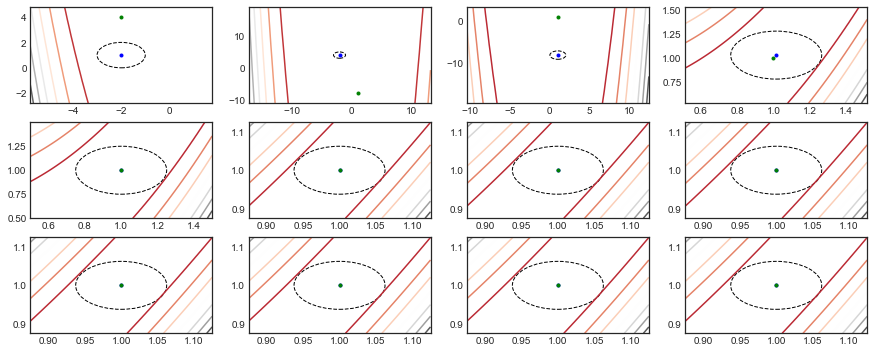

In [214]:
##########
# Ex: 4.2
##########

def rosenbrock(x1, x2=None):
    if x2 is None:
        x2 = x1[1]
        x1 = x1[0]
    return 100 * (x2-x1**2)**2 + (1-x1)**2

def rosenbrockGradient(x):
    partial_x = -400*x[0]*(x[1] - x[0]**2) + 2*(1-x[0])
    partial_y = 200* (x[1]-x[0]**2)
    gradient_xy = np.matrix([partial_x, partial_y])
    return gradient_xy.T

# Actual hessian used for bk0
def rosenbrockHessian(x):
    partial_xx = -400*(x[1] - 3*x[0]**2) -2
    partial_xy = -400*x[0]
    partial_yy = 200
    hessian = np.matrix([[partial_xx, partial_xy], [partial_xy, partial_yy]])
    return hessian.T


a = np.array([-2, 1])
print(a)
trustRegion(a, rosenbrock, rosenbrockGradient, rosenbrockHessian)


